In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path_income = '/content/drive/MyDrive/machine learning/income'

In [ ]:
df= pd.read_csv(path_income , na_values=[' ?','? ','?'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.shape

(48842, 15)

In [ ]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
list(df.select_dtypes(['object']).columns)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [ ]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)

**EDA**

In [ ]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
si = SimpleImputer(strategy = 'most_frequent')

# si.fit_transform(df['workclass','occupation','native-country'])

In [ ]:
df.corr()

<ipython-input-378-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [ ]:
df['income'] = df['income'].replace(['<=50K','>50K'],[0,1])

In [ ]:
X = df.iloc[:,0:14]

In [ ]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Private,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


<Axes: xlabel='income', ylabel='count'>

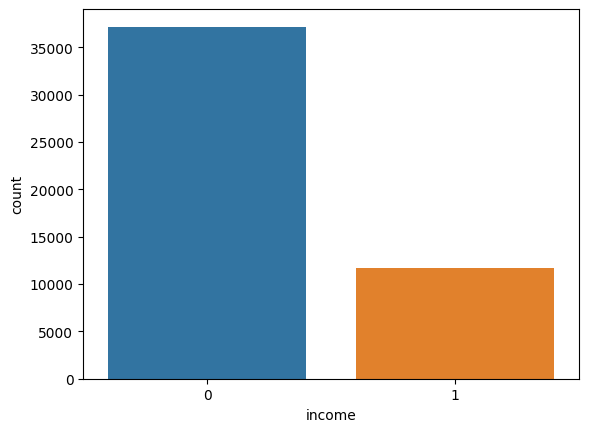

In [ ]:
sns.countplot(data = df, x = df['income'])


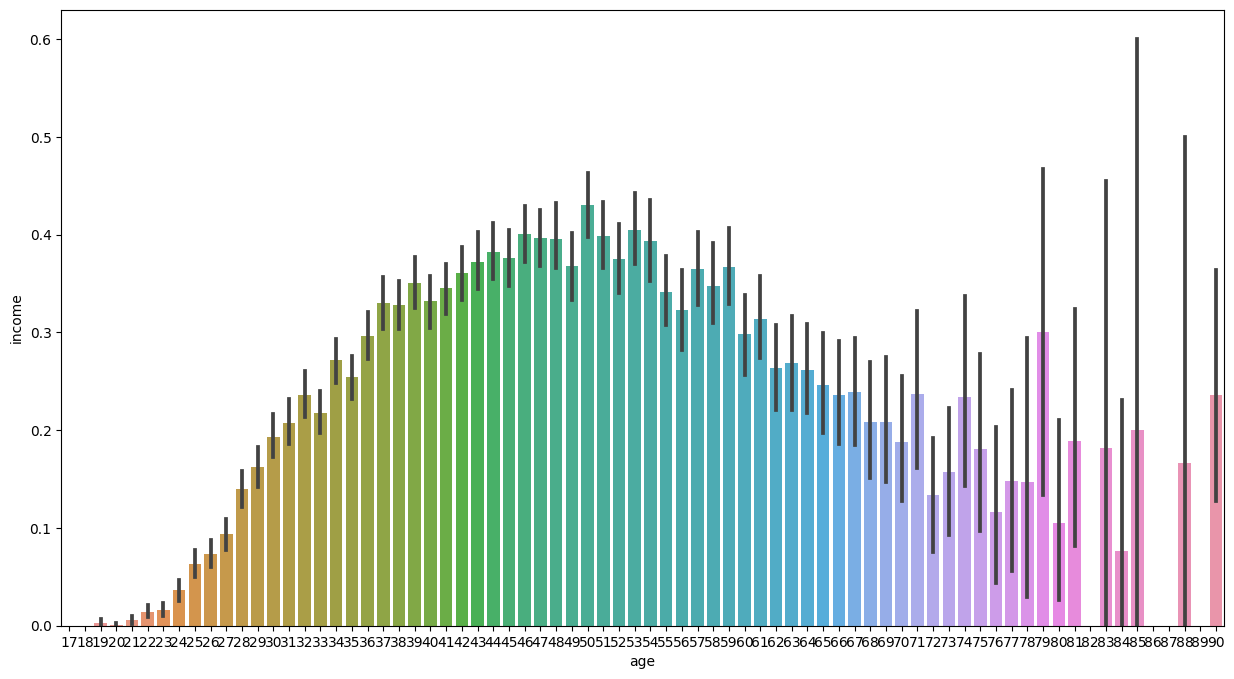

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data = df, x = df['age'], y = df['income'])

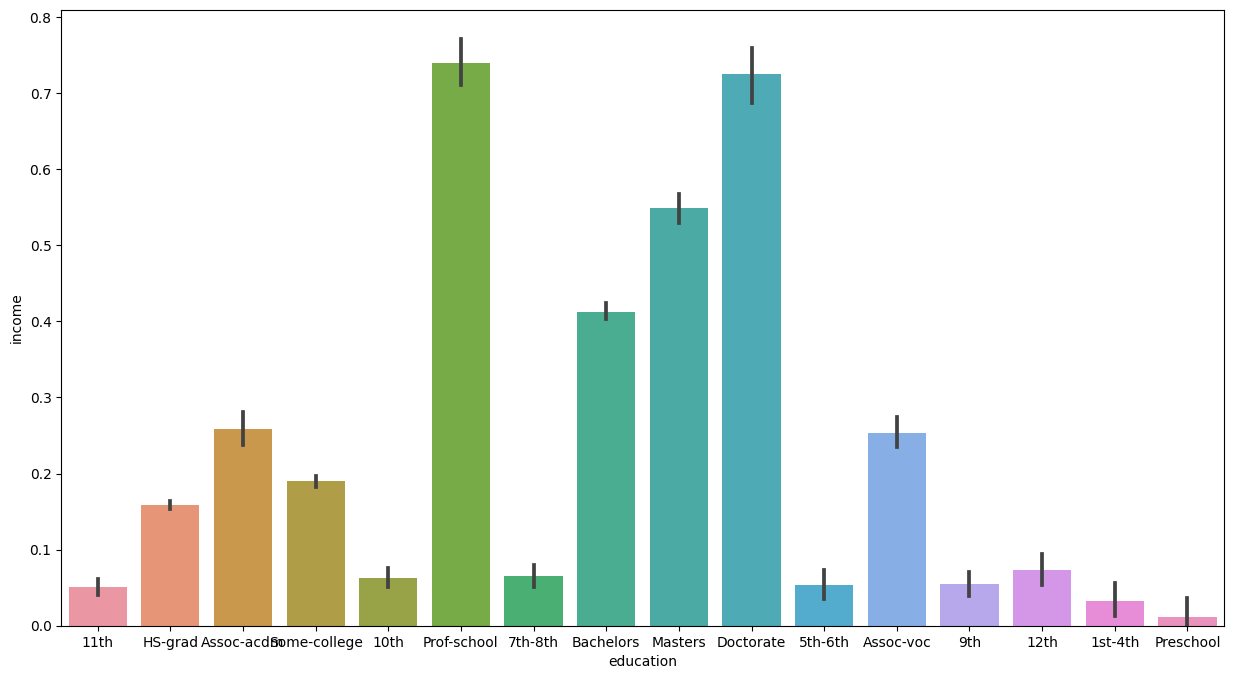

In [ ]:
plt.figure(figsize =(15,8))
ax =sns.barplot(data = df , x = df['education'],y =df['income'])

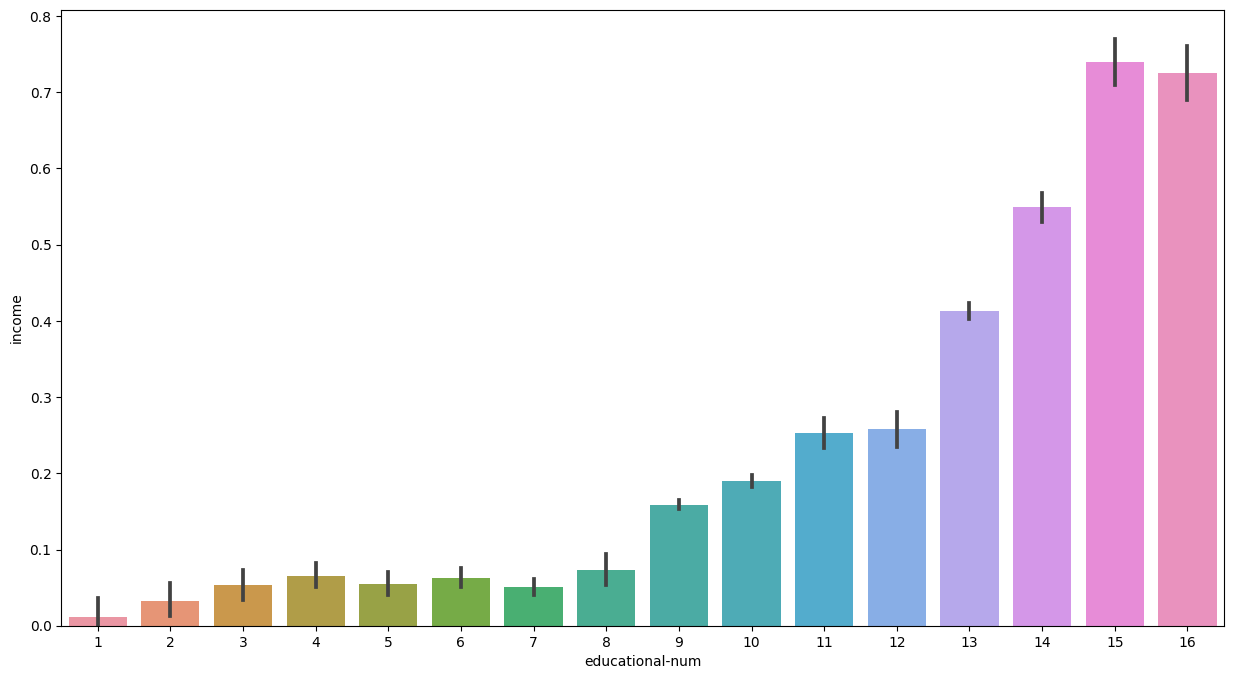

In [ ]:
plt.figure( figsize = (15,8))
ax = sns.barplot(data =df , x = df['educational-num'],y = df['income'])


<Axes: xlabel='gender', ylabel='income'>

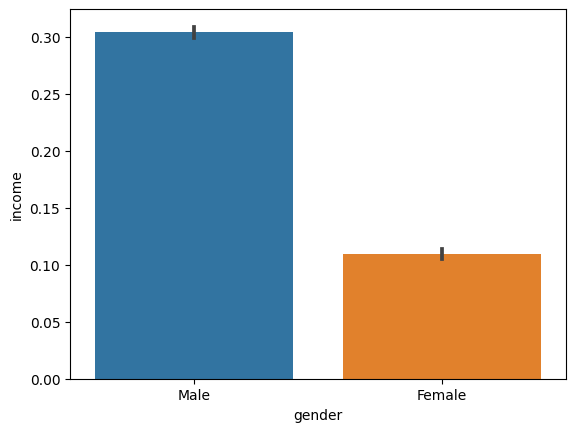

In [ ]:
sns.barplot(data = df , x= df['gender'],y =df['income'])

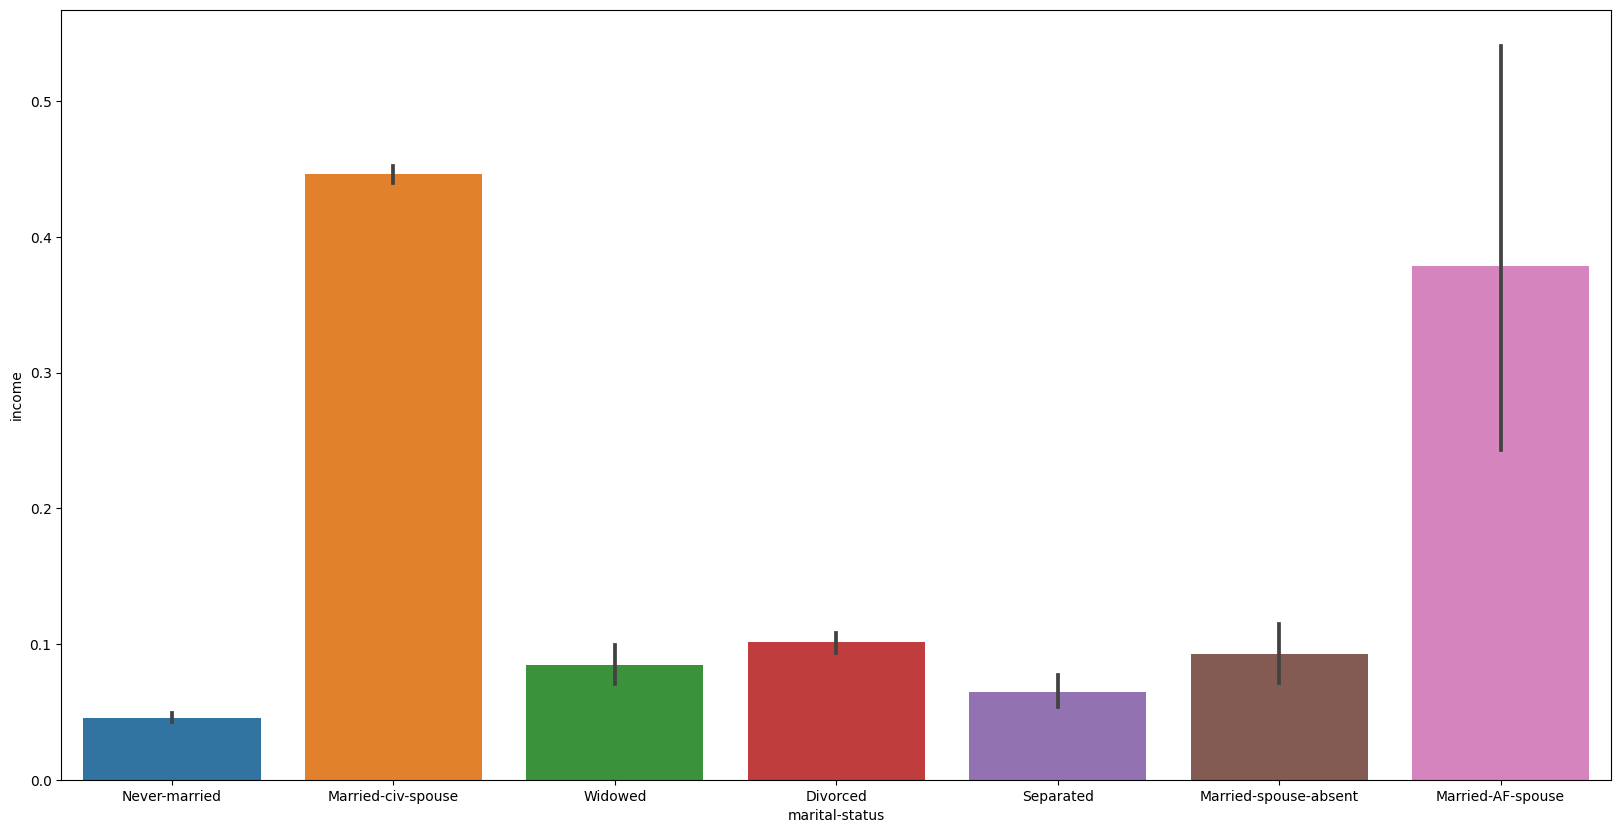

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df, x =df['marital-status'],y=df['income'])

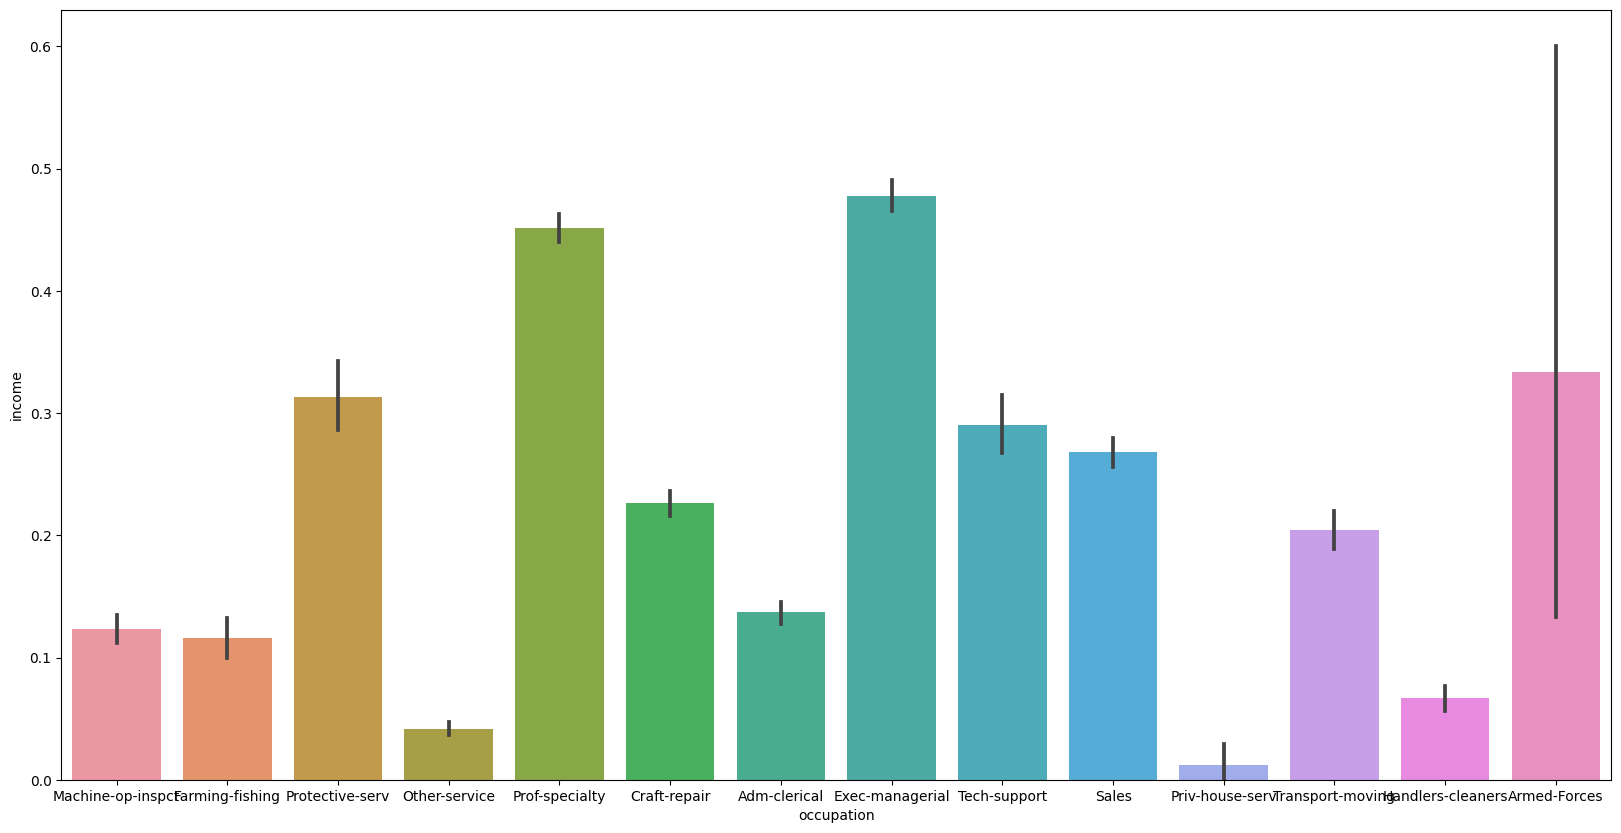

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df, x =df['occupation'],y=df['income'])

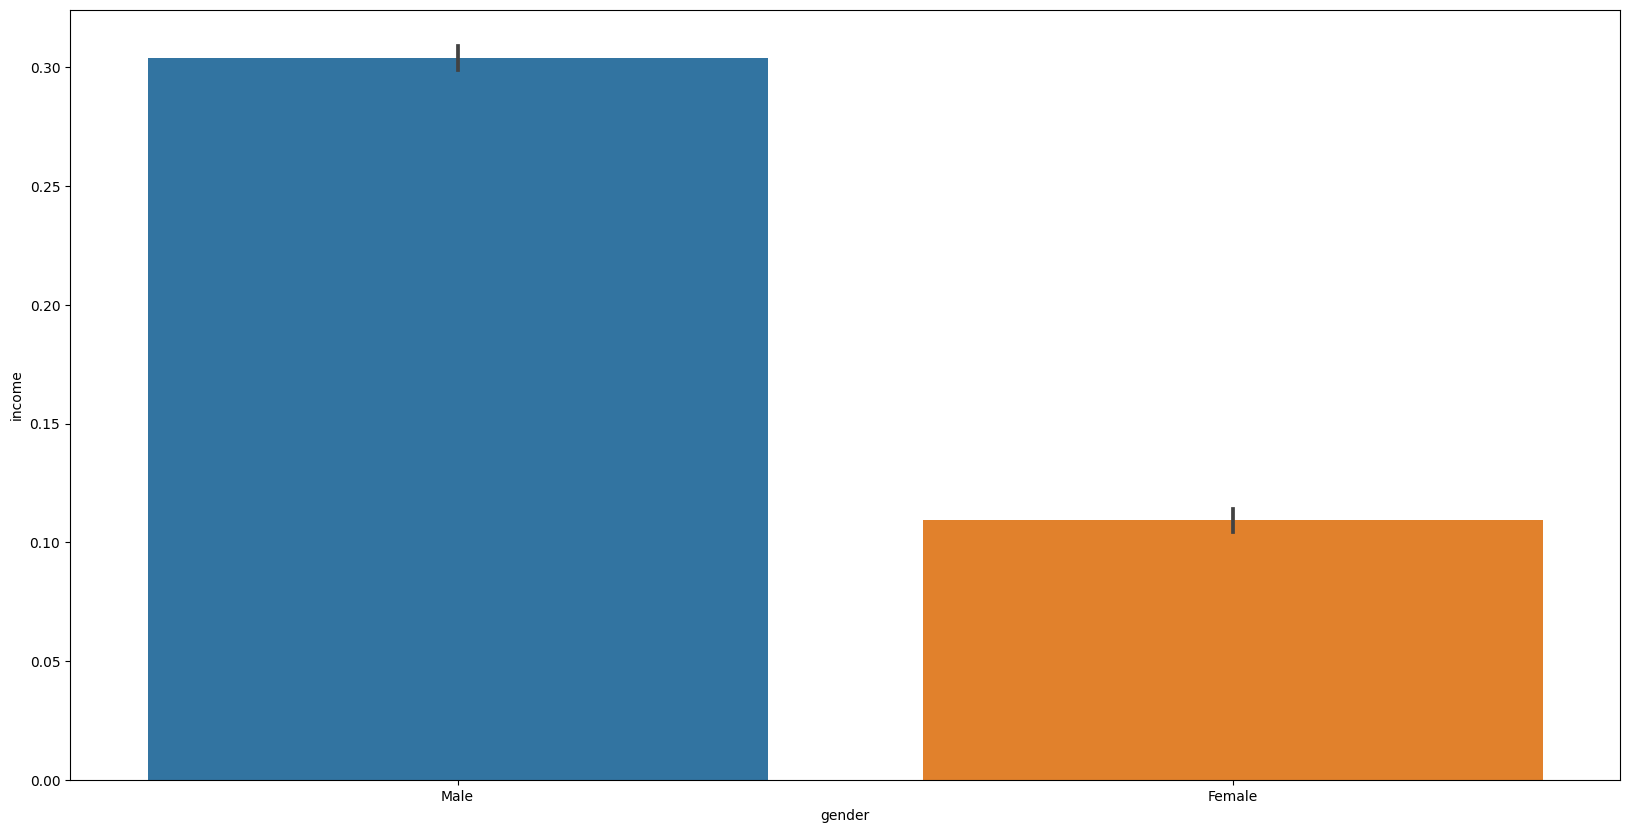

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df, x =df['gender'],y=df['income'])

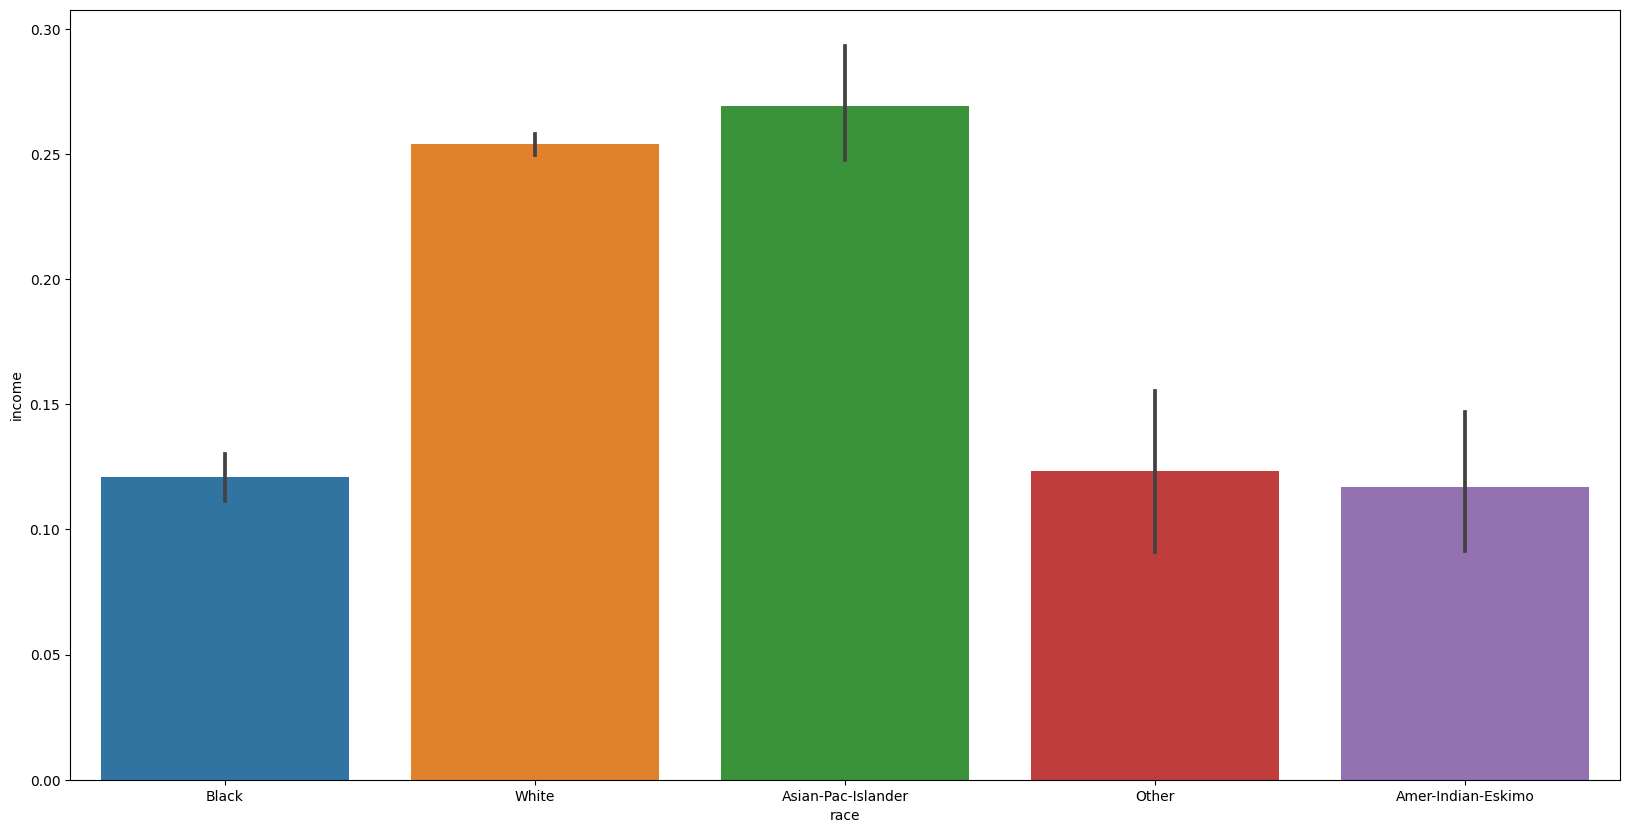

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df, x =df['race'],y=df['income'])

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


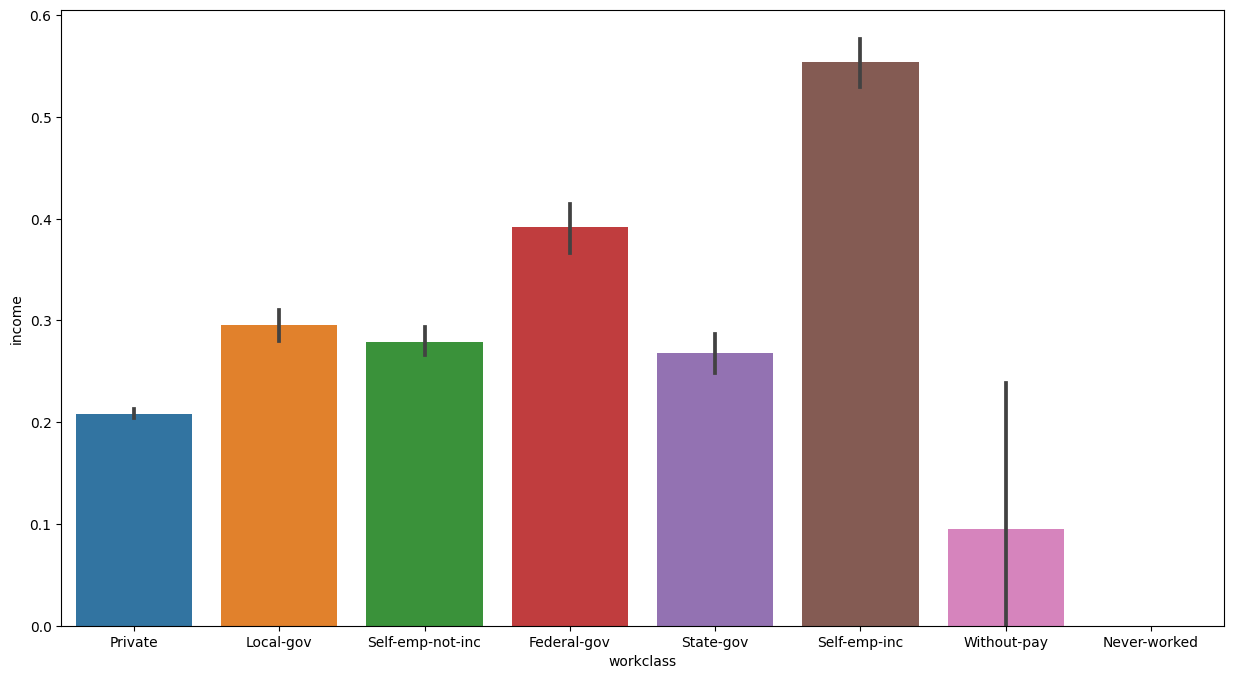

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data = df , x = df['workclass'],y=df['income'])

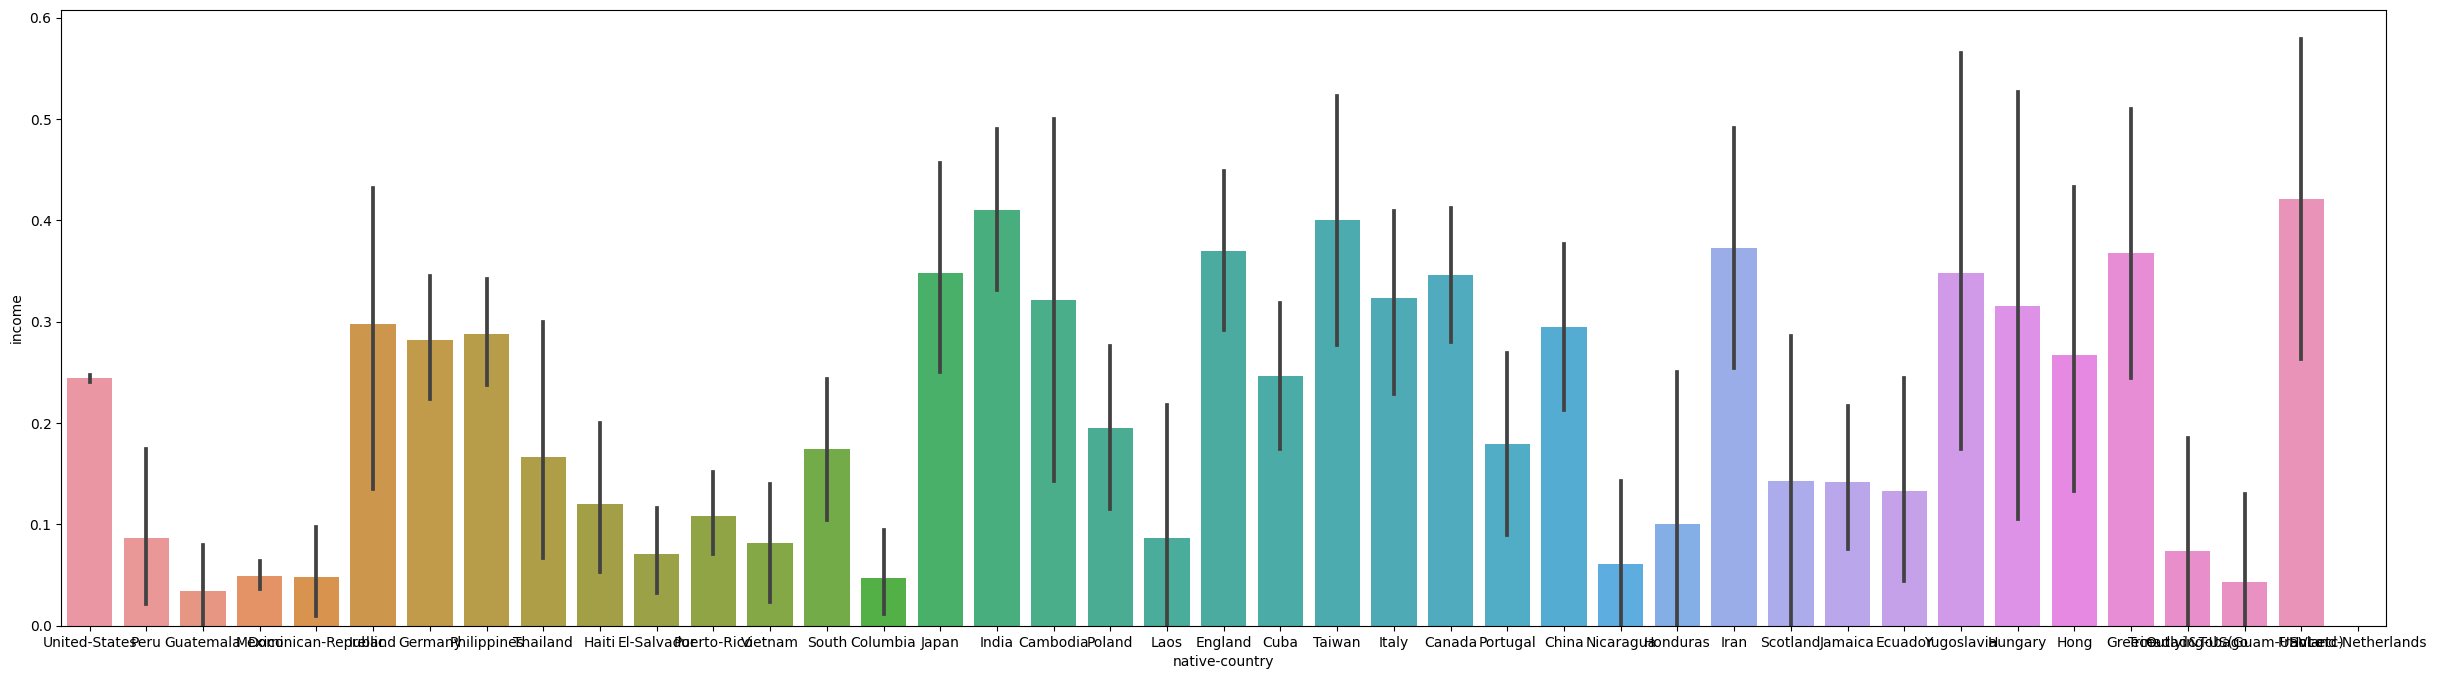

In [ ]:
plt.figure(figsize=(30,8))
ax=sns.barplot(data=df, x =df['native-country'],y=df['income'])

In [ ]:
df.groupby('native-country')['income'].mean()

native-country
Cambodia                      0.321429
Canada                        0.346154
China                         0.295082
Columbia                      0.047059
Cuba                          0.246377
Dominican-Republic            0.048544
Ecuador                       0.133333
El-Salvador                   0.070968
England                       0.370079
France                        0.421053
Germany                       0.281553
Greece                        0.367347
Guatemala                     0.034091
Haiti                         0.120000
Holand-Netherlands            0.000000
Honduras                      0.100000
Hong                          0.266667
Hungary                       0.315789
India                         0.410596
Iran                          0.372881
Ireland                       0.297297
Italy                         0.323810
Jamaica                       0.141509
Japan                         0.347826
Laos                          0.086957
Mexico    

In [ ]:
df.groupby('gender')['income'].mean()

gender
Female    0.109251
Male      0.303767
Name: income, dtype: float64

In [ ]:
df.groupby('relationship')['income'].mean()

relationship
Husband           0.448671
Not-in-family     0.101407
Other-relative    0.034529
Own-child         0.014642
Unmarried         0.060293
Wife              0.468897
Name: income, dtype: float64

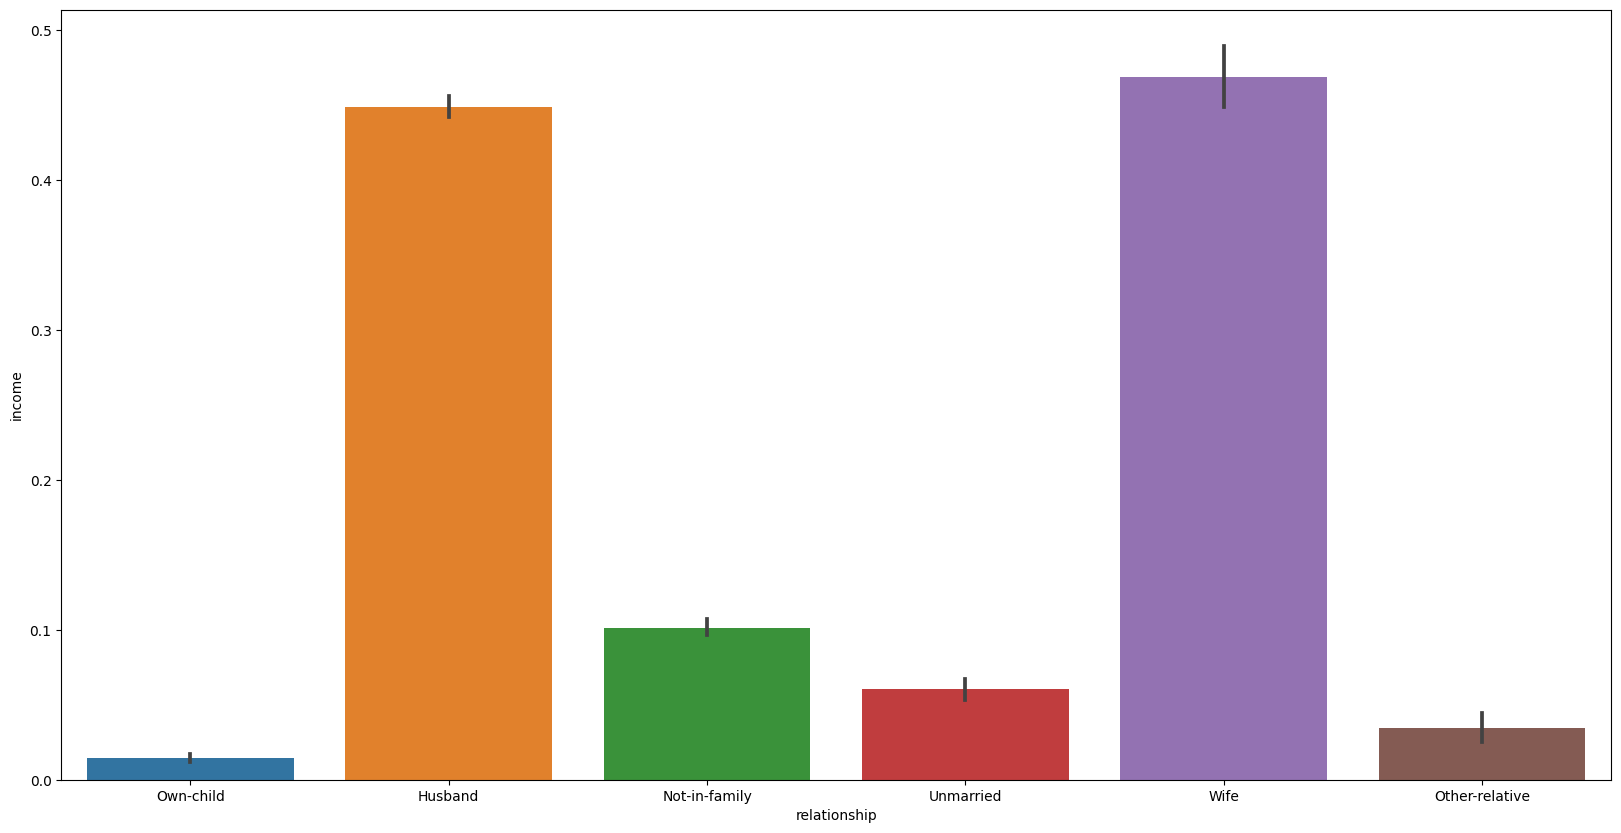

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df, x =df['relationship'],y=df['income'])

In [ ]:
df.corr()

<ipython-input-398-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
list(df.select_dtypes(['object',]).columns)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [ ]:
df.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace=(True))

In [ ]:
df['native-country'].fillna(df['native-country'].mode()[0],inplace=(True))

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0


In [ ]:
X = df.drop(columns=['income','fnlwgt','relationship','native-country','hours-per-week'])

In [ ]:
X

,age,workclass,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss
0,25,Private,11th,7,Never-married,Machine-op-inspct,Black,Male,0,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0
4,18,Private,Some-college,10,Never-married,Prof-specialty,White,Female,0,0
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0


In [ ]:
X_columns = X.loc[:,['workclass','education','marital-status','occupation','race','gender']]

In [ ]:
X_num_columns = X.loc[:,['age','educational-num','capital-gain','capital-loss']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse_output = False, drop='first')

X_transform =pd.get_dummies(X_columns)

In [ ]:
X_new = pd.concat((X_transform,X_num_columns),axis=1)

In [ ]:
X_new.values

array([[    0,     0,     0, ...,     7,     0,     0],
       [    0,     0,     0, ...,     9,     0,     0],
       [    0,     1,     0, ...,    12,     0,     0],
       ...,
       [    0,     0,     0, ...,     9,     0,     0],
       [    0,     0,     0, ...,     9,     0,     0],
       [    0,     0,     0, ...,     9, 15024,     0]])

In [ ]:
Y = df['income'].values

In [ ]:
Y

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_new,Y, test_size=(0.2),random_state=2)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
accuracy_score = accuracy_score(y_pred,y_test)

In [ ]:
print('accuracy' , accuracy_score)

accuracy 0.8436892210052206


In [ ]:
print('mis classified sample %d' % (y_test != y_pred).sum())

mis classified sample 1527
